<a href="https://colab.research.google.com/github/bulatych/ML_HSE/blob/main/homeworks/HW_3_(Regression).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---

# Introduction

In this homework you will:

* Recall your skills of data analysis and preprocessing.
* Explore the behaviour of different machine learning models.
* Try to solve a regression type problem and interpret the results.

But first of all, a few notes:

* Check the 3rd and 4th seminars for a quick reminder on general rules.
* We do not expect you to make a model that makes necessarly good predictions, rather than explain why do you get the results which you get.
* We reserve the right to lower the grade for messy code, so keep it clean and make comments about what you do! It is also your responsibility to test your own code.
* Remember to submit the feedback! Especially if the homework was too difficult or easy for you.

This time, you will do the coding part yourself. That means, you take decisions about EDA, data cleaning, hyperparameters choice, etc. on your own (for the most part, at least).

Another important mention: your work must be reproducible.
It means that it would be possible to run your code and obtain the same results by pressing "Run All" button in settings of this notebook. To do so, don't forget to fix the random seed number where possible!

# Dataset

Today your task will be to understand the relationship between the cholesterol level and its associated factors, such as gender, age, BMI, medical condition and some genomic features. This can be explored by a regression analysis using machine learning methods that we learned in the class.

Description of the variables:

* DM: diabetes mellitus: 0 = no diabetes, 1 = diabetes
* age: Age in years
* chol: Serum total cholesterol, mg/dl
* BMI: Body-mass index, kg/m2
* TG: Serum triglycerides, mg/dl
* APOE: Apolipoprotein E genotype, with six genotypes coded 1-6: 1 = e2/e2, 2 = e2/e3, 3 = e2/e4, 4 = e3/e3, 5 = e3/e4, 6 = e4/e4
* rs174548: Candidate SNP 1 genotype, chromosome 11, physical position 61,803,876
. Coded as the number of minor alleles: 0 = C/C, 1 = C/G, 2 = G/G.
* rs4775041: Candidate SNP 2 genotype, chromosome 15, physical position 58,382,496. Coded as the number of minor alleles: 0 = C/C, 1 = C/G, 2 = G/G.
* HTN: diagnosed hypertension: 0 = no, 1 = yes
* chd: diagnosis of coronary heart disease: 0 = no, 1 = yes

Target variable: Serum total cholesterol

<font color=#c30>**Disclaimer:**</font> it is expected that you WON'T get good metrics with this dataset. We encourage experimentation with data and models to improve the result, but a low final metric will not affect your grade.

# Tasks <font color=#c30>**[8]**</font>

### Exploratory Data Analysis <font color=#c30>**[2.5]**</font>

<font color=#c30>**[0.1]**</font> Before the analysis itself, don't forget to check the features you are working with. Some of them are not very obvious. Google some information on what those features represent, and write it down here:

* TG - These are fats present in the blood that the body uses for energy. High triglyceride levels can increase the risk of heart disease.
* APOE -  a protein involved in lipid metabolism. The APOE genotype affects blood cholesterol levels and risk of developing Alzheimer's disease and heart diseases.

* rs174548 -  one of several SNPs that lie in a linkage disequilibrium block containing the FADS1 gene was strongly associated with a number of glycerophospholipid concentrations.
* rs4775041 - it is a SNP on chromosome 15, also potentially related to lipid metabolism

You can (and should!) use this information when interpreting results.

Download the data:

In [281]:
!gdown 1PrtyKo4e_q7jm7lR27CL7VbWVC8vZoWP
!ls

Downloading...
From: https://drive.google.com/uc?id=1PrtyKo4e_q7jm7lR27CL7VbWVC8vZoWP
To: /content/Data-Cholesterol-V2.csv
100% 11.4k/11.4k [00:00<00:00, 31.5MB/s]
Data-Cholesterol-V2.csv  sample_data


In [282]:
import pandas as pd
df = pd.read_csv('Data-Cholesterol-V2.csv')
df.head(n=10)


,DM,age,chol,BMI,TG,APOE,rs174548,rs4775041,HTN,chd
0,1,74,215,26.2,367,4,1,2,1,1
1,1,51,204,24.7,150,4,2,1,1,1
2,0,64,205,24.2,213,4,0,1,1,0
3,0,34,182,23.8,111,2,1,1,1,0
4,1,52,175,34.1,328,2,0,0,1,0
5,1,39,176,22.7,53,4,0,2,0,0
6,0,79,159,22.9,274,2,2,1,1,0
7,0,38,169,24.9,137,2,1,1,0,0
8,0,52,175,20.4,125,4,0,1,0,0
9,0,58,189,22.0,209,5,0,1,1,0


In [283]:
df.shape[0]

400

In [284]:
# Let's calculate total number of nulls for each column

isnull = df.isnull()
isnull = isnull.sum()
isnull
# Print columns with 1 or more null value
isnull[isnull > 0]

,0
BMI,37


There are 37 observations for BMI with NaN values. Let's assume that sample size is large enough to train the model, so we will remove the lines from NaN

In [285]:
df_clean = df.dropna(subset=['BMI'])
print(df_clean.dtypes)
print(df_clean.describe())

DM             int64
age            int64
chol           int64
BMI          float64
TG             int64
APOE           int64
rs174548       int64
rs4775041      int64
HTN            int64
chd            int64
dtype: object
               DM         age        chol         BMI          TG        APOE  \
count  363.000000  363.000000  363.000000  363.000000  363.000000  363.000000   
mean     0.495868   54.487603  183.674931   24.954821  177.834711    3.931129   
std      0.500673   14.412883   22.219625    3.120144   87.905149    0.903153   
min      0.000000   30.000000  117.000000   19.400000   47.000000    2.000000   
25%      0.000000   42.500000  168.000000   22.650000  113.500000    4.000000   
50%      0.000000   54.000000  183.000000   24.500000  156.000000    4.000000   
75%      1.000000   67.000000  200.000000   26.750000  233.000000    4.000000   
max      1.000000   80.000000  244.000000   38.800000  671.000000    6.000000   

         rs174548   rs4775041         HTN     

Looking at the dataset variables, we can say that most of them are represented by the `int` and `float` data types. Here I have also provided summary statistics for all variables after deleting the missing values.
Categorical variables in the dataset are already represented by the numeric type `int`

Categorial columns will be encoded later by one-hot encoding.

It is worth noting that the dataset does not present observations with the APOE genotype: 1

In [286]:
df_clean['APOE'].unique()


array([4, 2, 5, 3, 6])

In [287]:
df_clean

,DM,age,chol,BMI,TG,APOE,rs174548,rs4775041,HTN,chd
0,1,74,215,26.2,367,4,1,2,1,1
1,1,51,204,24.7,150,4,2,1,1,1
2,0,64,205,24.2,213,4,0,1,1,0
3,0,34,182,23.8,111,2,1,1,1,0
4,1,52,175,34.1,328,2,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
394,1,79,161,27.2,257,4,1,0,1,0
395,0,71,169,25.8,322,4,0,0,1,0
397,1,33,180,20.6,56,4,0,1,1,0
398,1,78,212,24.0,273,4,1,0,1,0


<font color=#c30>**[0.5]**</font> Know your data, make relevant data analysis and explain:
 * What types of variables there are
 * Your strategy about NaN values, if any present
 * Your strategy about categorical columns, if any present


Assuming our data is now certainly clean, we can start looking at the features.

<font color=#c30>**[1.75]**</font>
* Apply strategies you described above.
* Make relevant visualization of features(histograms, boxplots, etc.) and analyze it.
* Explore the relationship of features and interpret it if possible.
* Deal with outliers and other dataset artifacts, if needed.

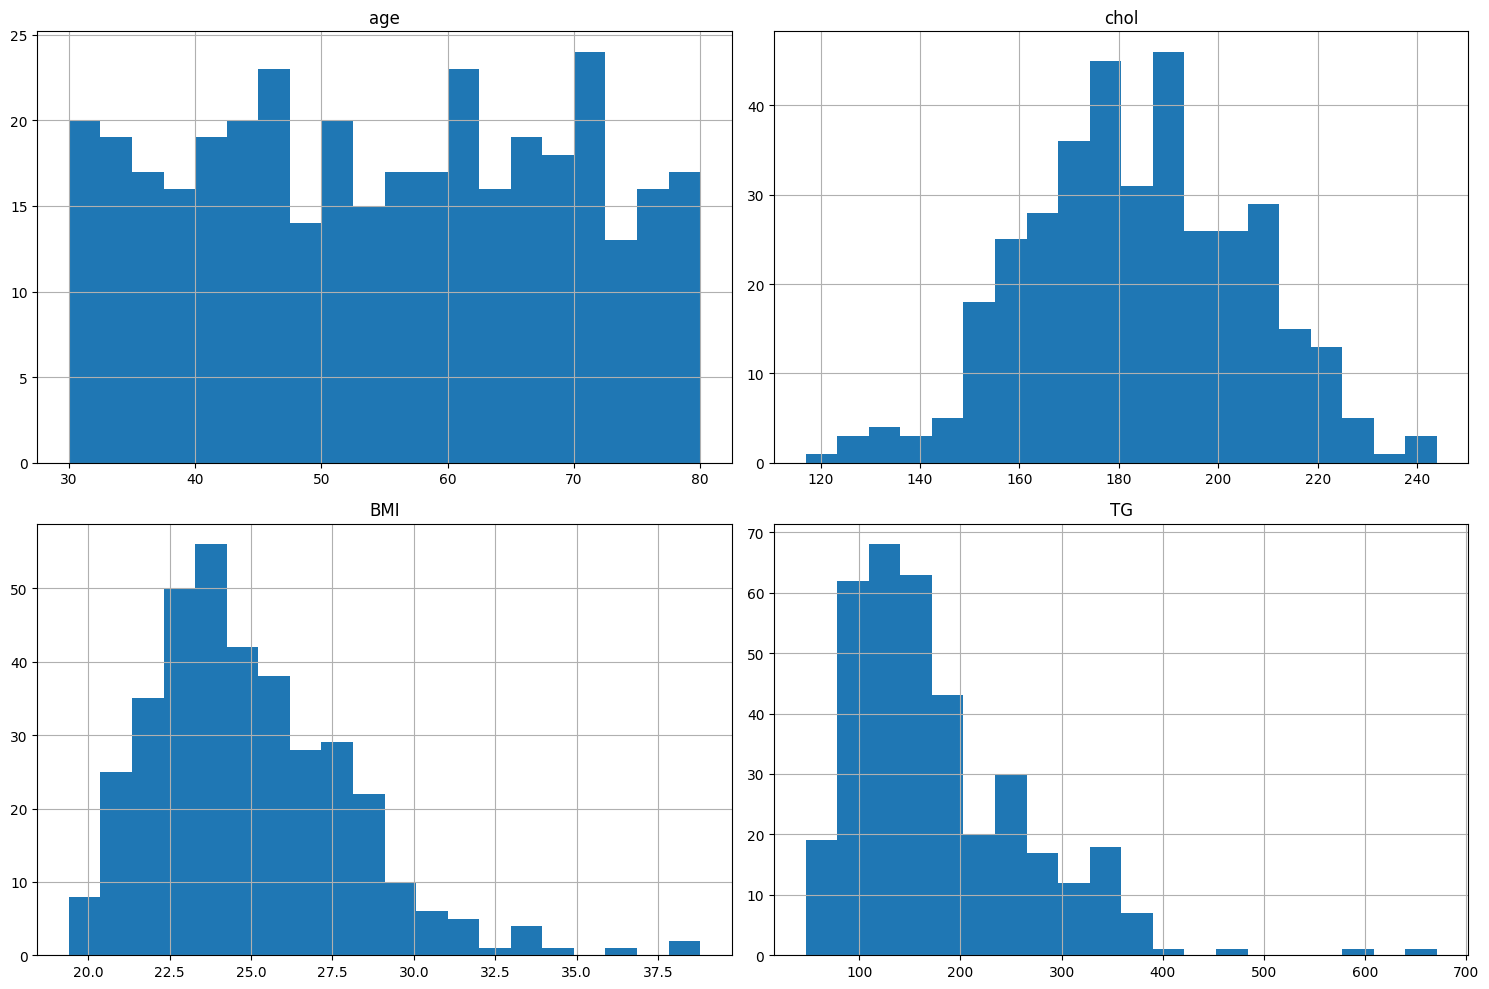

In [288]:
numeric = ['age', 'chol', 'BMI', 'TG']
df_clean[numeric].hist(bins=20, figsize=(15, 10))
plt.tight_layout()
plt.show()

Some extreme peaks can be seen on the constructed histograms. We can make a boxplot graph to see if there are values beyond 1.5 IQR

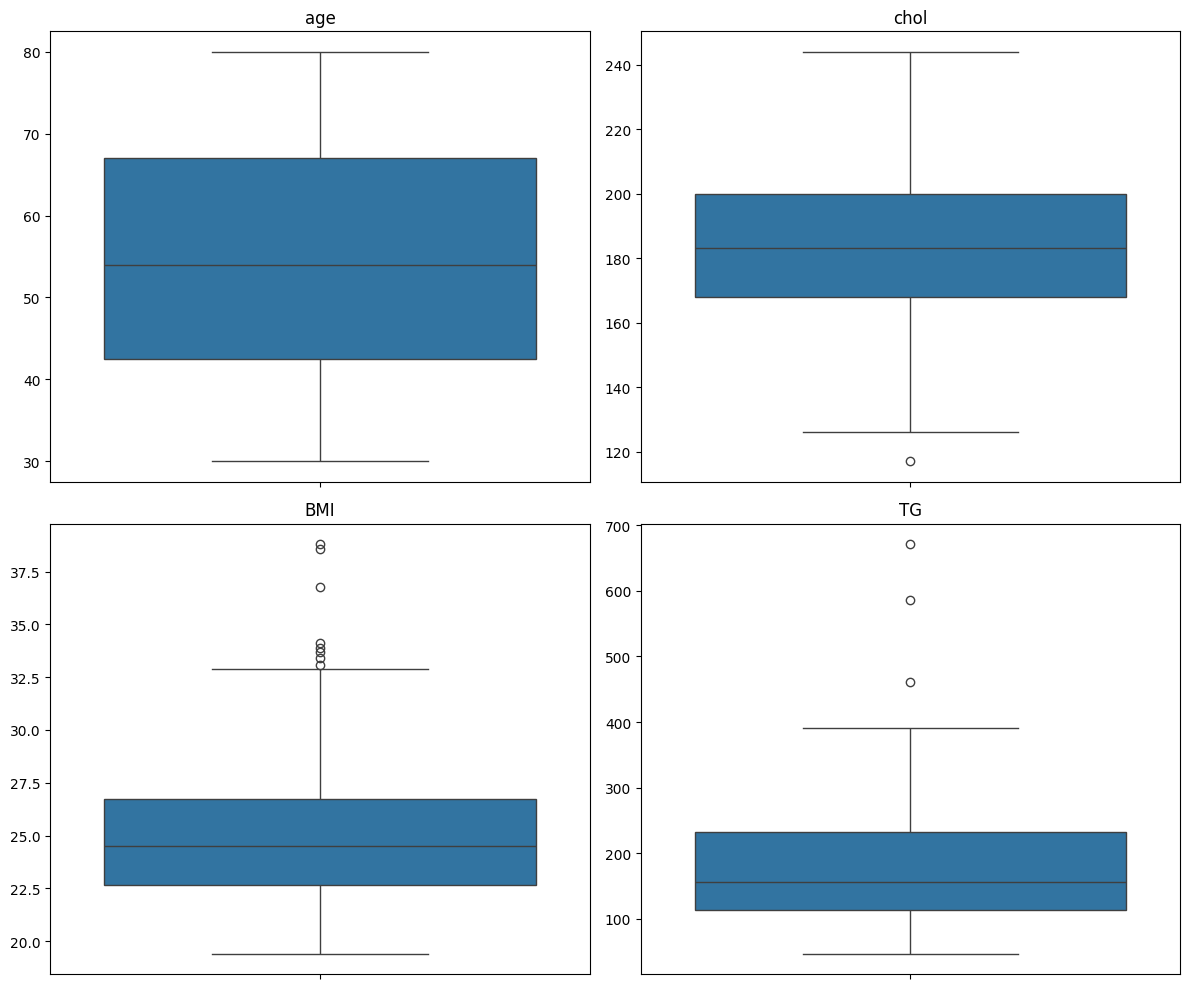

In [289]:
selected_vars = ['age', 'chol', 'BMI', 'TG']
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))  # 2x2 grid for 4 subplots
axes = axes.ravel()


assert len(selected_vars) == len(axes)

# Plot boxplot for each numeric column
for col, ax in zip(selected_vars, axes):
    sns.boxplot(y=df_clean[col], ax=ax)
    ax.set_title(col)
    ax.set(xlabel='', ylabel='')

plt.tight_layout()
plt.show()

Here we can notice values on the boxplots that go beyond 1.5 IQR. Let's try to remove these values.
One way to deal with outliers is to "trim" the data and keep only records where values in each column are within [ α , 1- α ] percentiles.

In [290]:
import pandas as pd
print(f"Records before: {len(df_clean)}")


# Получаем 0.01 и 0.99 процентиль для каждого столбца
low, high = 0.01, 0.99
quantiles = df_clean[numeric].quantile([low, high])

# Применяем обрезку, исключая выбросы
for col in quantiles.columns:
    low, high = quantiles[col].tolist()  # Получаем значения процентилей
    mask = (df_clean[col] >= low) & (df_clean[col] <= high)  # Создаем маску для фильтрации
    df_clean = df_clean[mask]  # Фильтруем DataFrame

print(f"Records after trimming: {len(df_clean)}")

Records before: 363
Records after trimming: 333


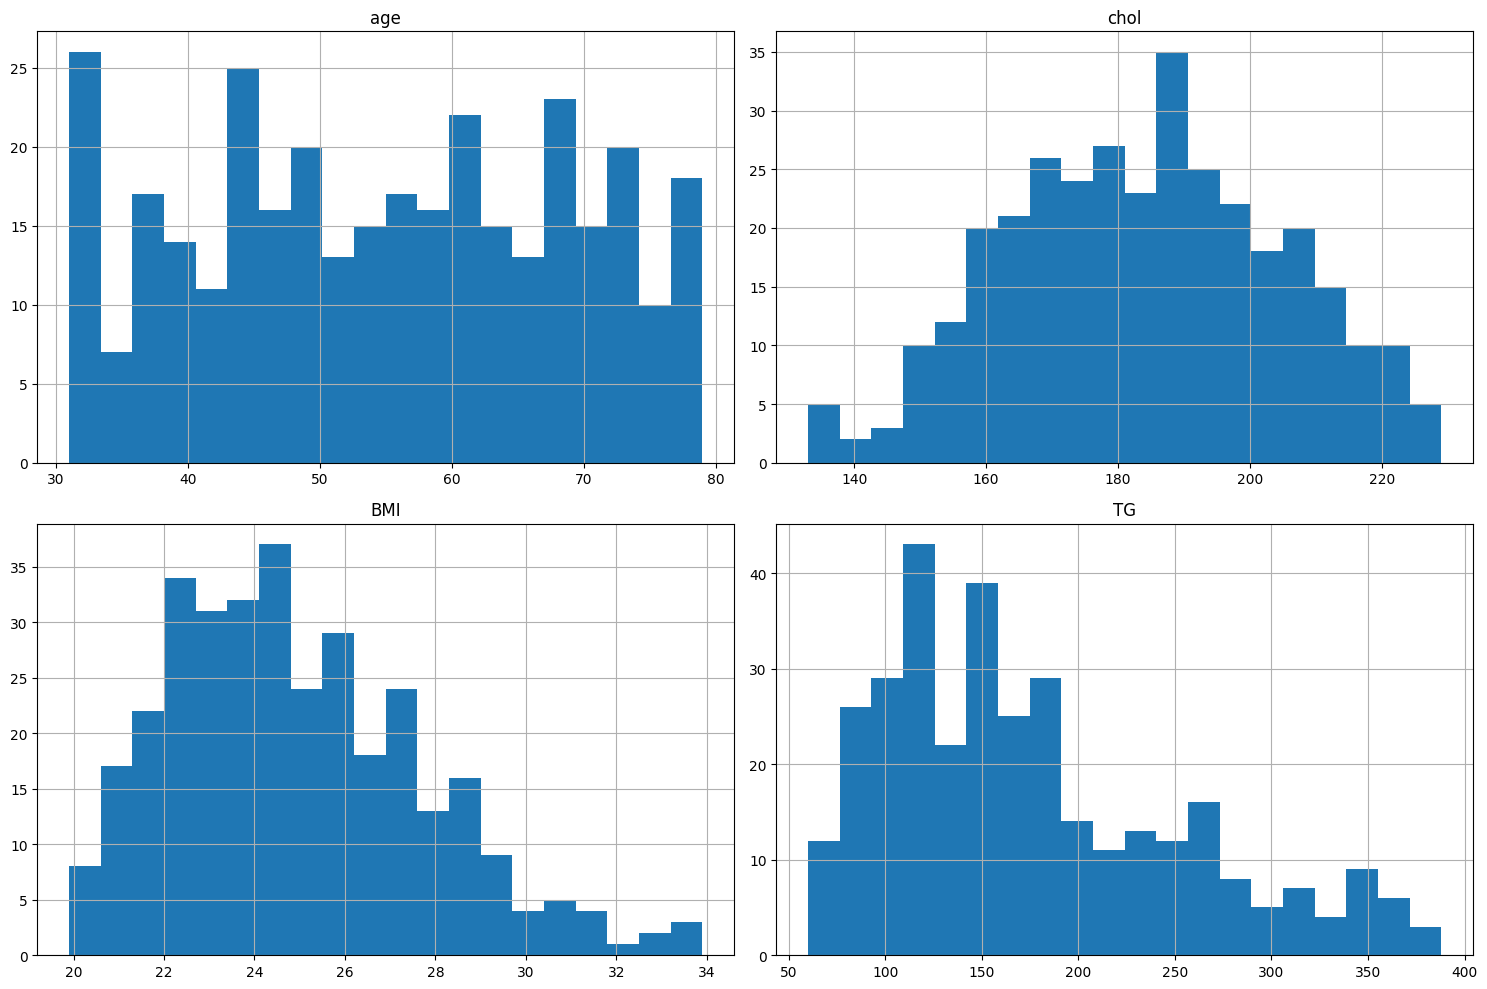

In [291]:
df_clean[numeric].hist(bins=20, figsize=(15, 10))
plt.tight_layout()
plt.show()

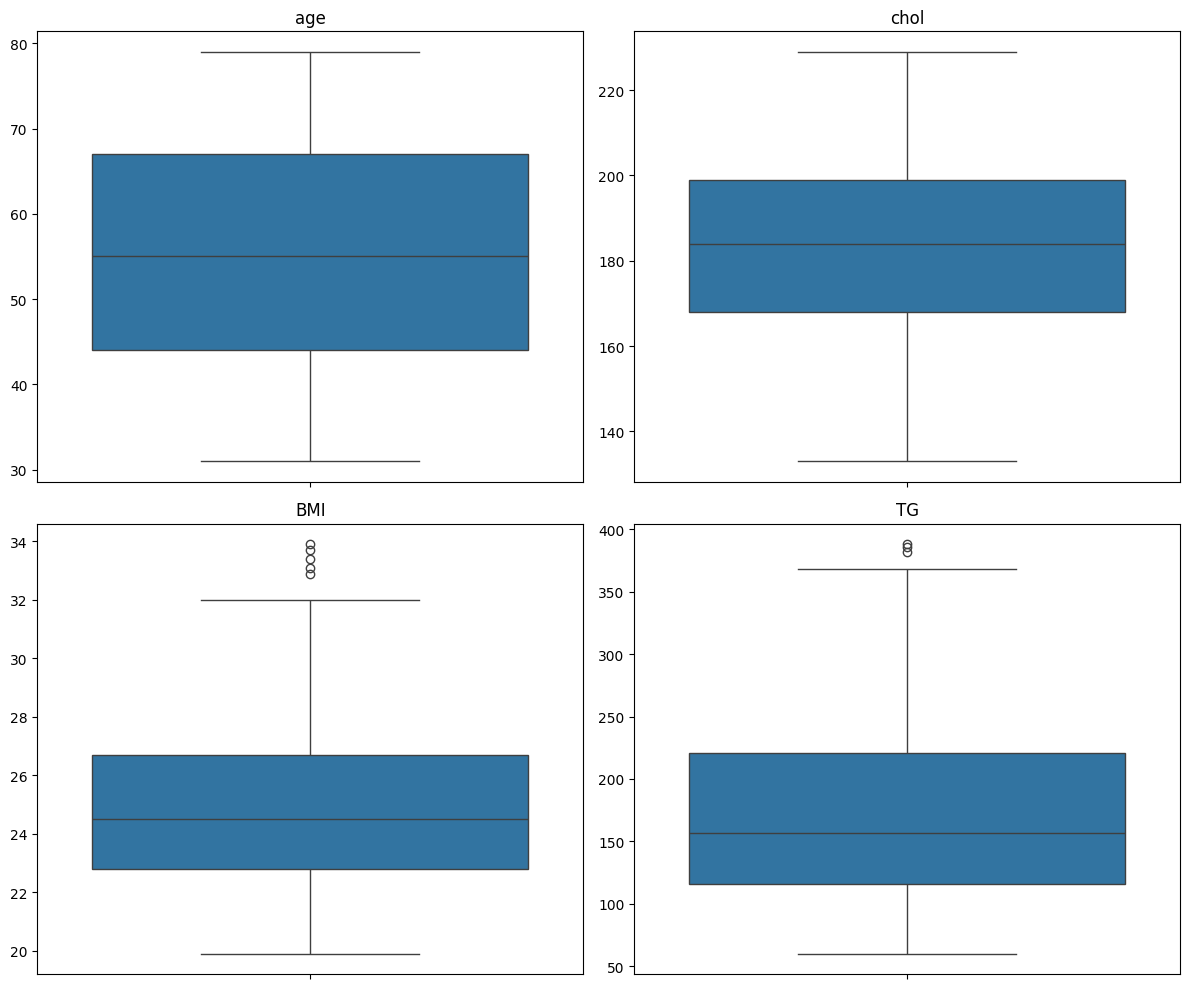

In [292]:
selected_vars = ['age', 'chol', 'BMI', 'TG']
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))  # 2x2 grid for 4 subplots
axes = axes.ravel()


assert len(selected_vars) == len(axes)

# Plot boxplot for each numeric column
for col, ax in zip(selected_vars, axes):
    sns.boxplot(y=df_clean[col], ax=ax)
    ax.set_title(col)
    ax.set(xlabel='', ylabel='')

plt.tight_layout()
plt.show()

Now we have removed about 30 values resembling outliers using percentiles and now there are no separate peaks on the histogram. In view of the not too large amount of data, we will leave the remaining values beyond the 1.5 IQR and proceed to training the model





Now let's move on to finding relationships in the data

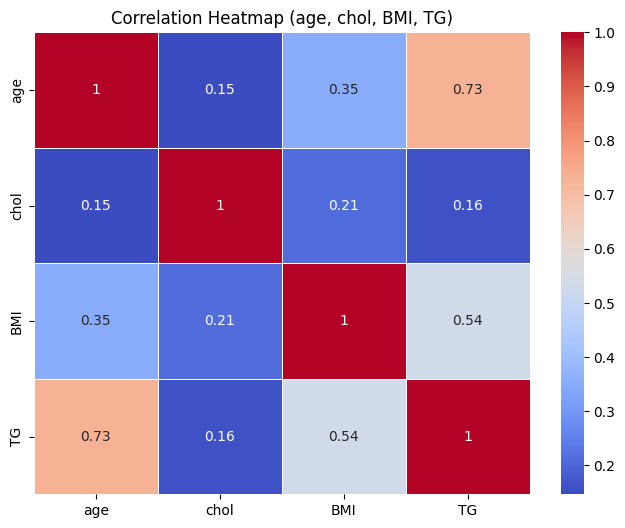

In [293]:
import matplotlib.pyplot as plt
import seaborn as sns

# First look at correlations
# We select only the numeric columns
subset = df_clean[['age', 'chol', 'BMI', 'TG']]
corr_matrix_subset = subset.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix_subset, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap (age, chol, BMI, TG)')
plt.show()

As expected, BMI and level TG in blood strongly correlate with age. Changes in BMI and TG level can be explained due to age-related changes in fat metabolism and other factors such as diet and activity levels.

Next, let's plot the distribution of the target variable with respect to the categorical features (different deseases)


Text(0.5, 0, 'APOE genotype')

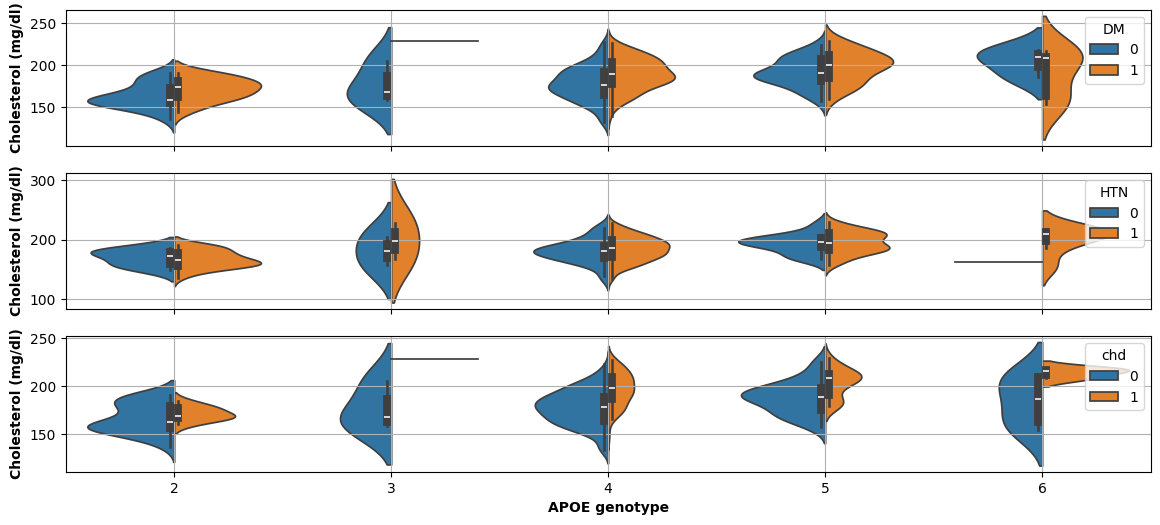

In [294]:
fig, axes = plt.subplots(nrows=3, figsize=(14, 6), sharex=True)

# Violinplots for DM and HTN and chd
for hue, ax in zip(['DM', 'HTN', 'chd'], axes):
    sns.violinplot(data=df_clean, x='APOE', y='chol', hue=hue, split=True, ax=ax)
    ax.grid()
    ax.set_ylabel("Cholesterol (mg/dl)", fontweight='bold')
    ax.set_xlabel(None)

ax.set_xlabel("APOE genotype", fontweight='bold')

Here we can distrubutions of cholesterol level due to different diseases. It is known that people with the 4 = e3/e3, 5 = e3/e4, 6 = e4/e4 genotypes have a higher risk of developing atherosclerosis and coronary heart disease, probably due to elevated cholesterol levels.
On average, the distribution peaks are at the same level for different genotypes for DM and HTN

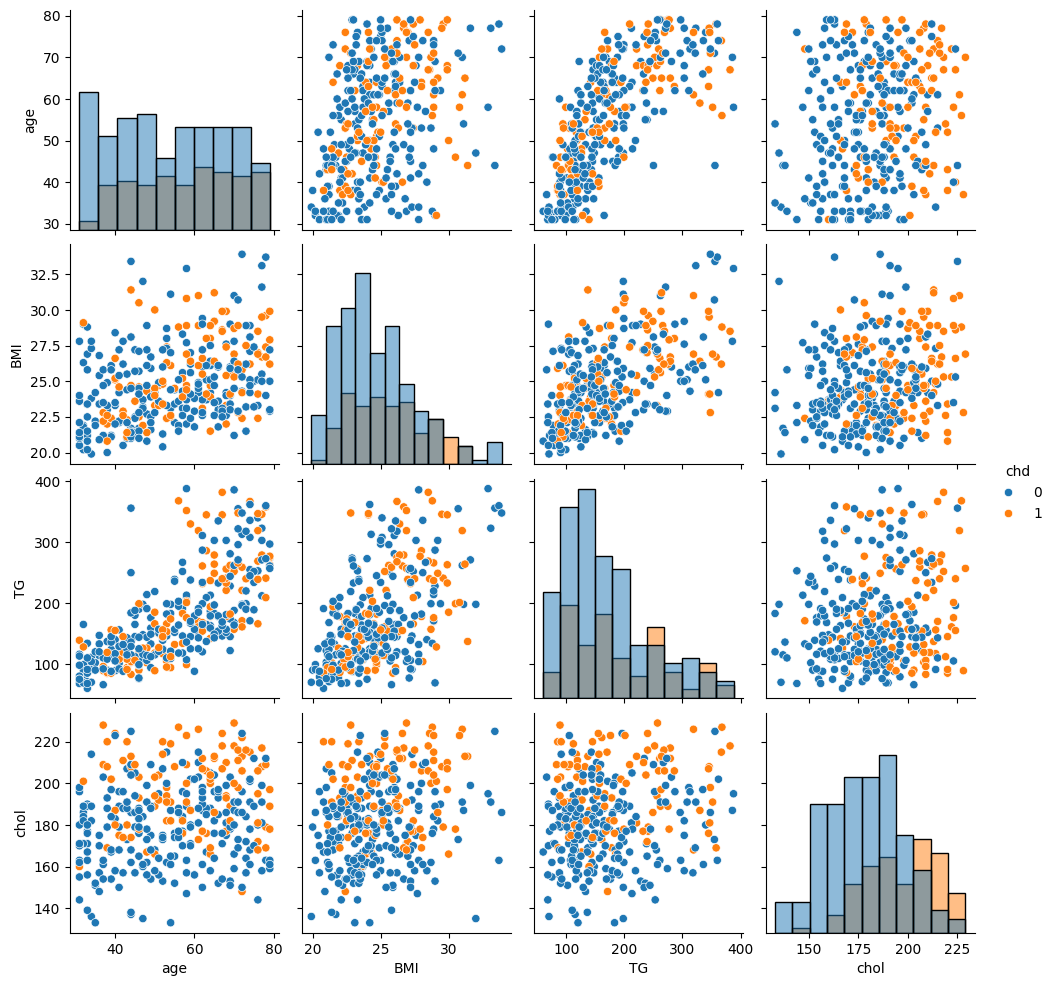

In [295]:
# fig = plt.figure()
# ax = fig.gca()
ax = sns.pairplot(df_clean, vars=['age', 'BMI', 'TG', 'chol'], hue='chd', diag_kind='hist')
# fig.show()

These plots also show that people with coronary heart disease have higher cholesterol levels.
Here we can see also some correlations. For example, there is weak correlation between BMI and cholesterol levels  and stronger correlation between TG and BMI

<font color=#c30>**[0.15]**</font> Answer the following questions:

* Why can't categorical attributes be encoded with natural numbers?

When you encode categorical attributes with natural numbers (e.g., 0, 1, 2), the model may interpret these numbers as having a meaningful order or hierarchy. For example, if you have categories like "red," "green," and "blue" encoded as 0, 1, and 2, the model might infer that "green" is somehow between "red" and "blue," which is not true.
This ordinality can lead to incorrect assumptions about the relationships between categories, affecting the model's predictions and performance.


* Would fields like 'id' cause the model (not necessarily linear) to overfit? Why?

Yes, 'id' could lead to overfit, because when a model is trained on data with unique identifiers, it may learn to fit the noise associated with those identifiers rather than generalizing to new, unseen data. As a result, the model might perform exceptionally well on the training data but poorly on validation or test data, a classic case of overfitting.



### ML-specific prepocessing



 Since machines can only work with numbers, we first need to encode our categorical variables. We will use dummy variables (also known as hot-coded functions)

In [296]:
df_clean_fix = pd.get_dummies(df_clean, columns=['DM', 'APOE', 'rs174548', 'rs4775041', 'HTN', 'chd'], drop_first=True)
df_clean_fix.head(n=10)

,age,chol,BMI,TG,DM_1,APOE_3,APOE_4,APOE_5,APOE_6,rs174548_1,rs174548_2,rs4775041_1,rs4775041_2,HTN_1,chd_1
0,74,215,26.2,367,True,False,True,False,False,True,False,False,True,True,True
1,51,204,24.7,150,True,False,True,False,False,False,True,True,False,True,True
2,64,205,24.2,213,False,False,True,False,False,False,False,True,False,True,False
3,34,182,23.8,111,False,False,False,False,False,True,False,True,False,True,False
6,79,159,22.9,274,False,False,False,False,False,False,True,True,False,True,False
7,38,169,24.9,137,False,False,False,False,False,True,False,True,False,False,False
8,52,175,20.4,125,False,False,True,False,False,False,False,True,False,False,False
9,58,189,22.0,209,False,False,False,True,False,False,False,True,False,True,False
10,43,207,21.0,122,False,False,False,True,False,True,False,False,False,True,False
11,64,166,26.1,163,True,False,True,False,False,False,False,False,False,True,False


In [297]:
df_clean_fix.shape[0]

333

### Machine Learning <font color=#c30>**[5.5]**</font>

<font color=#c30>**[0.25]**</font> Split the data into train/test subsets and choose your target performance measure. Explain your choice.

In [298]:
import numpy as np
from sklearn.model_selection import train_test_split
print("Before:")
print(f"\tData: {df_clean_fix.shape}")

# Dividing the data into training and test samples
train, test = train_test_split(df_clean_fix, test_size=0.3, random_state=42)

print("After:")
print(f"\tTrain: {train.shape}")
print(f"\tTest: {test.shape}")

Before:
	Data: (333, 15)
After:
	Train: (233, 15)
	Test: (100, 15)


I choose R^2 as a performance metric, as it allows us to understand what proportion of the variance of the dependent variable (cholesterol level) can be explained by independent variables.

We can see that the train and test data are representative

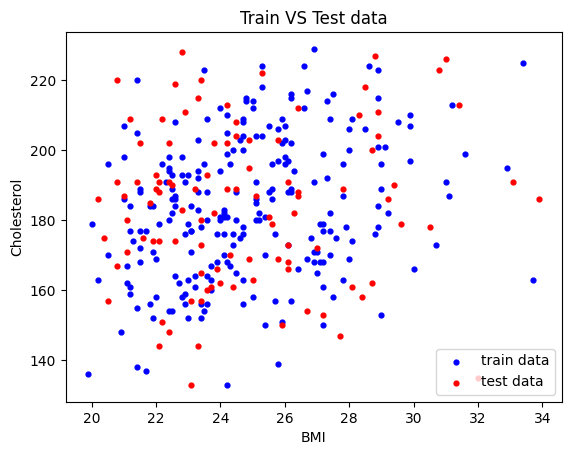

In [299]:
plt.scatter(train['BMI'], train['chol'], color='b', s=12, label='train data')
plt.scatter(test['BMI'], test['chol'], color='r', s=12, label='test data')
plt.xlabel('BMI')
plt.ylabel('Cholesterol')
plt.legend()
plt.title('Train VS Test data')
plt.show()

<font color=#c30>**[0.15]**</font> Answer the following questions:

* Why do we need to scale the feature matrix before training machine learning models?

Real-world datasets frequently contain features with different magnitudes, ranges, and units. To enable machine learning models to interpret these features consistently, it is essential to perform feature scaling.
If one feature has a much larger scale than others, it can dominate distance calculations, disproportionately influencing the model. Scaling ensures that all features contribute equally.

* Why do you think we don't produce scaling of One Hot encoded features?

One-hot encoded features are binary (0 or 1). Scaling such features does not add value since they only have two distinct values. Scaling would change their interpretation and not provide any meaningful advantage. Also one-hot encoded features don't contribute to distances in the same way that continuous features do.

<font color=#c30>**[0.25]**</font> Apply transformation to data, if needed. Justfy your choice.

From previous plots we can notice tha some of our columns (BMI, TG, chol) are clearly not normal. That's why we can try power-transforming them.

In [300]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer

cols = ['chol', 'BMI', 'TG']
scaler = PowerTransformer().fit(train[cols])
# Apply the transformation to the training and test samples
for data in train, test:
  data[cols] = scaler.transform(data[cols])



<font color=#c30>**[0.25]**</font> Train a simple linear regression model, and rank it using test set. How well the model is doing?

In [301]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

lm = LinearRegression().fit(Xtrain, Ytrain)

# Calculating metrics for the training and test sets
for name, X, Y in [("train", Xtrain, Ytrain), ("test", Xtest, Ytest)]:
    # Making predictions
    Ypred = lm.predict(X)

    # MAE manually
    mae = np.abs(Y - Ypred).mean()

    # MAE using sklearn
    skmae = mean_absolute_error(Y, Ypred)

    r2 = r2_score(Y, Ypred)

    print(f"{name} set:")
    print(f"\tMAE (ours): {mae:.4f}")
    print(f"\tMAE (sklearn): {skmae:.4f}")
    print(f"\tR^2 score: {r2:.4f}\n")

train set:
	MAE (ours): 0.6532
	MAE (sklearn): 0.6532
	R^2 score: 0.3642

test set:
	MAE (ours): 0.7281
	MAE (sklearn): 0.7281
	R^2 score: 0.3401



<font color=#c30>**[0.1]**</font> Answer the following question:

* From a simple linear regression model point of view, are the largest weights always the most important ones?

<font color=#c30>**[0.25]**</font> Obtain weights of the linear regression equation for this model and interpret them.

In [302]:
weights = pd.DataFrame({"Weights": lm.coef_, "Features": features})
weights.sort_values("Weights")

,Weights,Features
12,-0.155178,HTN_1
11,-0.096226,rs4775041_2
2,-0.039709,TG
0,0.008159,age
10,0.010310,rs4775041_1
1,0.159629,BMI
9,0.208587,rs174548_2
3,0.225230,DM_1
8,0.260769,rs174548_1
5,0.622811,APOE_4


<font color=#c30>**[0.25]**</font>
* What are residuals?

Residuals are the differences between the observed values and the predicted values produced by a regression model.

* Make a residuals vs predictions plot below.
* What do you observe?

Ideally, the residuals should be randomly scattered around the horizontal line (y = 0), as we can see on the plot. This indicates that the model does not have systematic bias, and the errors are randomly distributed.

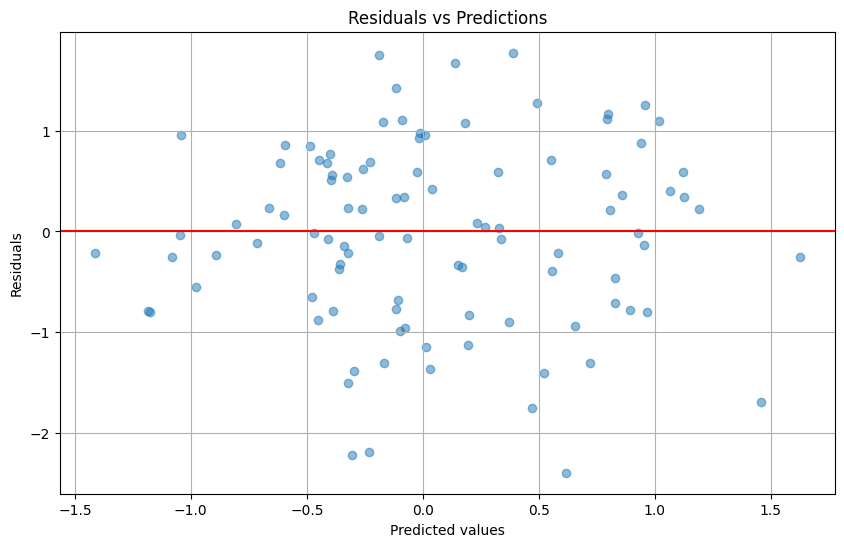

In [303]:
Ypred = lm.predict(Xtest)  # Predicted values
residuals = Ytest - Ypred  # Calculating the residuals

plt.figure(figsize=(10, 6))
plt.scatter(Ypred, residuals, alpha=0.5)
plt.axhline(0, color='red')
plt.title('Residuals vs Predictions')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

<font color=#c30>**[0.25]**</font> Now train the Lasso regression model. On a logarithmic scale, search for the optimal value of the regularization coefficient alpha.

In [304]:
from sklearn.linear_model import Lasso
Y = df_clean_fix['chol']
X = df_clean_fix.drop('chol', axis=1)

# # Split the data into train and test sets
# X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Define the range of alpha values (on a logarithmic scale)
alphas = np.logspace(-4, 1, 100)

# Initialize lists to store results
zero_weights = []
mae_scores = []

for alpha in alphas:
    # Create and fit the Lasso model
    lasso = Lasso(alpha=alpha, random_state=42)
    lasso.fit(X_train, Y_train)

    # Count the number of zero weights
    num_zero_weights = np.sum(lasso.coef_ == 0)
    zero_weights.append(num_zero_weights)

    # Predict and calculate MAE
    Y_pred = lasso.predict(X_test)
    mae = mean_absolute_error(Y_test, Y_pred)
    mae_scores.append(mae)


<font color=#c30>**[0.25]**</font> For each sampled alpha for Lasso, count the number of zero weights in the model and plot its dependence on alpha. How much will we have to lose in prediction quality if we want to get rid of at least half of the features using Lasso?

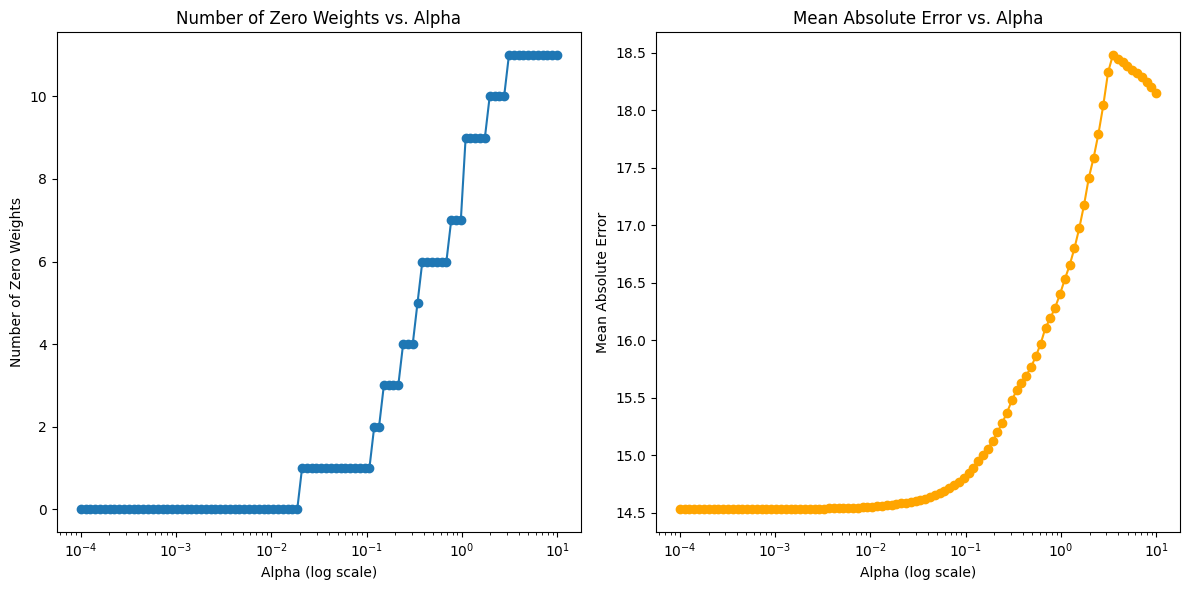

In [280]:

# Plot the number of zero weights vs. alpha
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(alphas, zero_weights, marker='o')
plt.xscale('log')
plt.title('Number of Zero Weights vs. Alpha')
plt.xlabel('Alpha (log scale)')
plt.ylabel('Number of Zero Weights')

# Plot MAE vs. alpha
plt.subplot(1, 2, 2)
plt.plot(alphas, mae_scores, marker='o', color='orange')
plt.xscale('log')
plt.title('Mean Absolute Error vs. Alpha')
plt.xlabel('Alpha (log scale)')
plt.ylabel('Mean Absolute Error')

plt.tight_layout()
plt.show()

From these plots we can say that with increasing _alpha_ the number of zero weights, as a rule, increases. This indicates that higher regularization values lead to the exclusion of more features from the model and lasso aims to minimize the complexity of the model.

_alpha_, at which a sharp increase in zero weights begins.This value may indicate the optimal level of regularization, at which the model retains a sufficient number of features for good prediction quality.

Usually, with increasing regularization, MAE decreases first, as the model becomes more resistant to overfitting, but with too much
_alpha_ MAE can start growing. This means that  model is getting too simple and can't work correctly

So, optimal value pf _alpha_ will be 0.1

In [306]:
# Find the alpha value where at least half of the features are eliminated
original_feature_count = X.shape[1]
half_features_threshold = original_feature_count / 2

# Find the alpha corresponding to this threshold
alpha_half_features = alphas[np.array(zero_weights) >= half_features_threshold][0]
mae_at_half_features = mae_scores[np.where(alphas == alpha_half_features)[0][0]]

# Calculate MAE for the full feature model (without Lasso)
lasso_full = Lasso(alpha=0).fit(X_train, Y_train)
Y_pred_full = lasso_full.predict(X_test)
mae_full = mean_absolute_error(Y_test, Y_pred_full)

print(f"Alpha to eliminate at least half the features: {alpha_half_features:.4f}")
print(f"MAE at this alpha: {mae_at_half_features:.4f}")
print(f"MAE with all features: {mae_full:.4f}")
print(f"Loss in prediction quality (MAE increase): {mae_at_half_features - mae_full:.4f}")


Alpha to eliminate at least half the features: 0.7743
MAE at this alpha: 16.1914
MAE with all features: 14.5271
Loss in prediction quality (MAE increase): 1.6643


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.962e+04, tolerance: 9.339e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent

As we can se,e we lose in prediction quality about **1.66** if we get rid half of features by  _alpha_ = 0.77

<font color=#c30>**[0.5]**</font> Train and optimize hyperparameters for Elastic Net, Ridge and Lasso models. Justify the parameters grid for each model. What number of cross-validation folds did you use? Why?

In [ ]:
# YOUR CODE HERE ᕦ(ò_óˇ)ᕤ

<font color=#c30>**[1]**</font> Use test set to rank optimized models. Describe and interpret results.

In [ ]:
# YOUR CODE HERE ᕦ(ò_óˇ)ᕤ

<font color=#c30>**[1]**</font> Perform a feature importance analysis for all models, interpret the results, and make appropriate comparisons.

In [ ]:
# YOUR CODE HERE ᕦ(ò_óˇ)ᕤ

<font color=#c30>**[1]**</font> Answer the following questions:

* Which model works the best with cholesterol data? Explain, what could be the reason for it.
* Based on your analysis above, have you found expected/unexpected important features? Is the connection with cholesterol level seems logical?
* Would you suggest to use that model to a doctor or use it in a real study?

# Extra points <font color=#c30>**[2]**</font>

In this part, you are tasked with implementing and testing two gradient descent methods for linear regression: classical GD and it's stochastic version. First, we generate some synthetic data for you to test on. You can change the values of variables, but note that your code should work with any given values.

In [ ]:
n_features = 5
n_objects = 1500

# Generate true weights
w_true = np.random.normal(size=(n_features,))

# Generate features and target variable based on true weights
X = np.random.uniform(-5, 5, (n_objects, n_features))
X *= (np.arange(n_features) * 2 + 1)[np.newaxis, :]
Y = X.dot(w_true) + np.random.normal(0, 1, (n_objects))

# Generate random initial weights
w_0 = np.random.uniform(-2, 2, (n_features))

* Implement GD and SGD for linear regression from scrath. You can reuse code from seminar.
* Implemented methods must work with any number of input features.

In [ ]:
def GD(X, y, w_0, max_iter=500, learning_rate=0.05):
    """
    Implementation of Gradient Descent by scratch.

    :parameters:
    X : np.ndarray, shape (n_objects, n_features)
        Input matrix of features.
    y : np.ndarray, shape (n_features, )
        Target variable vector.
    w_0 : np.ndarray, shape (n_objects, )
        Initial weights vector.
    max_iter: int
        Maximum number of GD iterations.
    learning_rate: float
        Learning rate coefficient of GD.

    :returns: list, updated weights array and MSE scores history
    """

    # YOUR CODE HERE ᕦ(ò_óˇ)ᕤ
    return [w, mse_scores]

def SGD(X, y, w_0, max_iter=500, batch_size=10, learning_rate=0.05):
    """
    Implementation of Stochastic Gradient Descent by scratch.

    :parameters:
    X : np.ndarray, shape (n_objects, n_features)
        Input matrix of features.
    y : np.ndarray, shape (n_features, )
        Target variable vector.
    w_0 : np.ndarray, shape (n_objects, )
        Initial weights vector.
    max_iter: int
        Maximum number of GD iterations.
    batch_size: int
        Batch size.
    learning_rate: float
        Learning rate coefficient of GD.

    :returns: list with updated weights array and MSE scores history
    """

    # YOUR CODE HERE ᕦ(ò_óˇ)ᕤ
    return [w, mse_scores]

* Make a plot that represent how MSE changes with each step. Find out what learning rate and batch size work best for this case. Compare how quickly each method converges.

In [ ]:
# YOUR CODE HERE ᕦ(ò_óˇ)ᕤ

* Do the same for cholesterol dataset. Is SGD applicable for this dataset or not?

In [ ]:
# YOUR CODE HERE ᕦ(ò_óˇ)ᕤ